# DNN model

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
import tensorflow as tf
import keras as K
from keras_applications import vgg16
from keras.utils import np_utils
import datetime

import warnings
warnings.filterwarnings("ignore")

In [22]:
import sys
import keras as K
import tensorflow as tf

py_ver = sys.version
k_ver = K.__version__
tf_ver = tf.__version__

print("Using Python version " + str(py_ver))
print("Using Keras version " + str(k_ver))
print("Using TensorFlow version " + str(tf_ver))

Using Python version 3.6.2 |Continuum Analytics, Inc.| (default, Jul 20 2017, 13:14:59) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Using Keras version 2.3.1
Using TensorFlow version 1.14.0


In [ ]:
# Version: python 3.6.2  tensorflow 1.14.0 keras 2.3.1

In [10]:
# DNN model

def DNN_Model(dataset=None,label=None,use_features=None,categorical_feats=None, n_class=3):
    input_length = dataset[use_features].shape[0]
    input_dim = dataset[use_features].shape[1]
    
    Y = np_utils.to_categorical(dataset[label],num_classes=3)
    x_train, x_test, y_train, y_test = train_test_split(dataset[use_features], Y,
                                                        train_size=0.7, test_size=0.3, random_state=0)    
    # define the model 
    init = K.initializers.glorot_uniform(seed=1)
    simple_adam = K.optimizers.Adam(lr=0.001)
    model = K.models.Sequential()
    model.add(K.layers.Dense(units=5, input_shape=(input_dim,), kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=6, kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=n_class, kernel_initializer=init, activation='softmax'))
    model.compile(loss="categorical_crossentropy",
                  optimizer=simple_adam,
                  #optimizer="rmsprop",
                  metrics=["accuracy"])
    # train the model
    b_size = 130
    max_epochs = 20
    print ("Start training \n")   
    history = model.fit(x_train, y_train, 
                        batch_size=b_size,
                        epochs=max_epochs,
                        shuffle=True,
                        validation_data=(x_test, y_test),
                        verbose=1)
    print ("Training completed \n")
    # evaluate the model performance
    # scores: includes val_loss and val_acc
    scores = model.evaluate(x_test, y_test, batch_size=b_size,verbose=0)
    print(scores)
    loss = scores[0]
    acc = scores[1]
    return loss,acc,history

In [11]:
# plot the learning curves
# use history function to collect losses and accuracies in each epoch

def plot_learning_curves(history):

    epochs = range(len(history.history['accuracy']))
    plt.figure()
    plt.plot(epochs,history.history['accuracy'],'b',label='Training accuracy')
    plt.plot(epochs,history.history['val_accuracy'],'r',label='Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    output_dir = "output/figures"
    plt.savefig('{}/model_accuracy.jpg'.format(output_dir))

    plt.figure()
    plt.plot(epochs,history.history['loss'],'b',label='Training loss')
    plt.plot(epochs,history.history['val_loss'],'r',label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig('{}/model_loss.jpg'.format(output_dir))
    
    return 

2020-12-14 17:41:21.952829
Start training 


Train on 3500 samples, validate on 1500 samples
Epoch 1/20
3500/3500 [==============================] - 1s 207us/step - loss: 3.5554 - accuracy: 0.5489 - val_loss: 2.2746 - val_accuracy: 0.7313
Epoch 2/20
3500/3500 [==============================] - 0s 25us/step - loss: 1.7576 - accuracy: 0.7509 - val_loss: 1.3666 - val_accuracy: 0.7613
Epoch 3/20
3500/3500 [==============================] - 0s 25us/step - loss: 1.1337 - accuracy: 0.7689 - val_loss: 0.9882 - val_accuracy: 0.7640
Epoch 4/20
3500/3500 [==============================] - 0s 30us/step - loss: 0.8818 - accuracy: 0.7714 - val_loss: 0.8367 - val_accuracy: 0.7680
Epoch 5/20
3500/3500 [==============================] - 0s 21us/step - loss: 0.7849 - accuracy: 0.7769 - val_loss: 0.7709 - val_accuracy: 0.7780
Epoch 6/20
3500/3500 [==============================] - 0s 25us/step - loss: 0.7320 - accuracy: 0.7894 - val_loss: 0.7189 - val_accuracy: 0.7847
Epoch 7/20
3500/3500 [==============

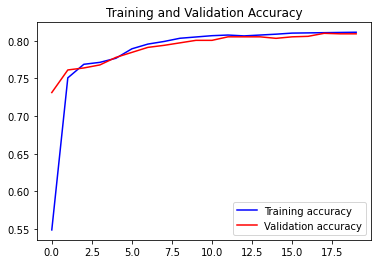

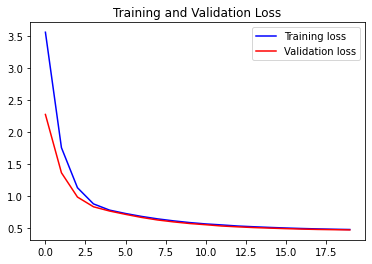

In [12]:
dataset = pd.read_csv('input/dataset_merged_2d.csv')[:5000]

del_feature = ['link','label']
use_features = [i for i in dataset.columns if i not in del_feature]
category = ["direction","pathclass","speedclass","LaneNum","level"]
print(datetime.datetime.now())

DNN = DNN_Model(dataset=dataset,label="label",
                use_features=use_features,
                categorical_feats=None, n_class=3)

loss = DNN[0]
acc = DNN[1]
history = DNN[2]

print("Loss on test set = ", loss)
print("Accuracy on test set = ", acc)

print(datetime.datetime.now())

plot_learning_curves(history)

In [13]:
# DNN model

def DNN_Model(dataset=None,label=None,use_features=None,categorical_feats=None, n_class=3):
    input_length = dataset[use_features].shape[0]
    input_dim = dataset[use_features].shape[1]
    
    Y = np_utils.to_categorical(dataset[label],num_classes=3)
    x_train, x_test, y_train, y_test = train_test_split(dataset[use_features], Y,
                                                        train_size=0.7, test_size=0.3, random_state=0)
    
    # define the model 
    init = K.initializers.glorot_uniform(seed=1)
    simple_adam = K.optimizers.Adam(lr=0.001)
    model = K.models.Sequential()
    model.add(K.layers.Dense(units=5, input_shape=(input_dim,), kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=6, kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=n_class, kernel_initializer=init, activation='softmax'))
    model.compile(loss="categorical_crossentropy",
                  optimizer=simple_adam,
                  #optimizer="rmsprop",
                  metrics=["accuracy"])

    # train the model
    b_size = 150
    max_epochs = 50
    print ("Start training \n")
    
    history = model.fit(x_train, y_train, 
                        batch_size=b_size,
                        epochs=max_epochs,
                        shuffle=True,
                        validation_data=(x_test, y_test),
                        verbose=1)
    print ("Training completed \n")
    
    # evaluate the model performance
    # scores: includes val_loss and val_acc
    scores = model.evaluate(x_test, y_test, batch_size=b_size,verbose=0)
    print(scores)
    loss = scores[0]
    acc = scores[1]
    
    return loss,acc,history

2020-12-14 17:42:27.473156
Start training 

Train on 3500 samples, validate on 1500 samples
Epoch 1/50
3500/3500 [==============================] - 1s 193us/step - loss: 3.7655 - accuracy: 0.5117 - val_loss: 2.4122 - val_accuracy: 0.7287
Epoch 2/50
3500/3500 [==============================] - 0s 24us/step - loss: 1.9192 - accuracy: 0.7414 - val_loss: 1.5037 - val_accuracy: 0.7553
Epoch 3/50
3500/3500 [==============================] - 0s 24us/step - loss: 1.2464 - accuracy: 0.7709 - val_loss: 1.0742 - val_accuracy: 0.7687
Epoch 4/50
3500/3500 [==============================] - 0s 24us/step - loss: 0.9439 - accuracy: 0.7740 - val_loss: 0.8783 - val_accuracy: 0.7673
Epoch 5/50
3500/3500 [==============================] - 0s 18us/step - loss: 0.8181 - accuracy: 0.7769 - val_loss: 0.7987 - val_accuracy: 0.7767
Epoch 6/50
3500/3500 [==============================] - 0s 24us/step - loss: 0.7599 - accuracy: 0.7846 - val_loss: 0.7490 - val_accuracy: 0.7800
Epoch 7/50
3500/3500 [===============

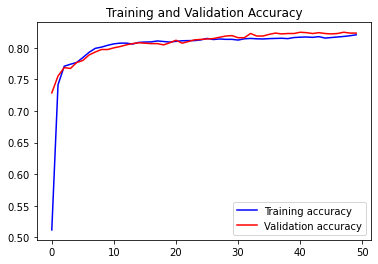

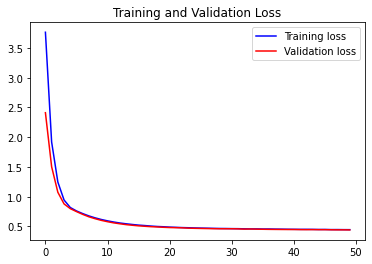

In [14]:
dataset = pd.read_csv('input/dataset_merged_2d.csv')[:5000]

del_feature = ['link','label']
use_features = [i for i in dataset.columns if i not in del_feature]
category = ["direction","pathclass","speedclass","LaneNum","level"]
print(datetime.datetime.now())

DNN = DNN_Model(dataset=dataset,label="label",
                use_features=use_features,
                categorical_feats=None, n_class=3)

loss = DNN[0]
acc = DNN[1]
history = DNN[2]

print("Loss on test set = ", loss)
print("Accuracy on test set = ", acc)

print(datetime.datetime.now())

plot_learning_curves(history)

In [16]:
# DNN model

def DNN_Model(dataset=None,label=None,use_features=None,categorical_feats=None, n_class=3):
    input_length = dataset[use_features].shape[0]
    input_dim = dataset[use_features].shape[1]
    
    Y = np_utils.to_categorical(dataset[label],num_classes=3)
    x_train, x_test, y_train, y_test = train_test_split(dataset[use_features], Y,
                                                        train_size=0.7, test_size=0.3, random_state=0)
    
    # define the model 
    init = K.initializers.glorot_uniform(seed=1)
    simple_adam = K.optimizers.Adam(lr=0.001)
    model = K.models.Sequential()
    model.add(K.layers.Dense(units=5, input_shape=(input_dim,), kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=6, kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=n_class, kernel_initializer=init, activation='softmax'))
    model.compile(loss="categorical_crossentropy",
                  optimizer=simple_adam,
                  #optimizer="rmsprop",
                  metrics=["accuracy"])

    # train the model
    b_size = 200
    max_epochs = 100
    print ("Start training \n")
    
    history = model.fit(x_train, y_train, 
                        batch_size=b_size,
                        epochs=max_epochs,
                        shuffle=True,
                        validation_data=(x_test, y_test),
                        verbose=1)
    print ("Training completed \n")
    
    # evaluate the model performance
    # scores: includes val_loss and val_acc
    scores = model.evaluate(x_test, y_test, batch_size=b_size,verbose=0)
    print(scores)
    loss = scores[0]
    acc = scores[1]
    
    return loss,acc,history

2020-12-14 17:44:30.119313
Start training 

Train on 3500 samples, validate on 1500 samples
Epoch 1/100
3500/3500 [==============================] - 1s 272us/step - loss: 4.0981 - accuracy: 0.4374 - val_loss: 2.7255 - val_accuracy: 0.7220
Epoch 2/100
3500/3500 [==============================] - 0s 18us/step - loss: 2.2628 - accuracy: 0.7277 - val_loss: 1.8342 - val_accuracy: 0.7427
Epoch 3/100
3500/3500 [==============================] - 0s 21us/step - loss: 1.5410 - accuracy: 0.7589 - val_loss: 1.3134 - val_accuracy: 0.7647
Epoch 4/100
3500/3500 [==============================] - 0s 19us/step - loss: 1.1450 - accuracy: 0.7714 - val_loss: 1.0309 - val_accuracy: 0.7687
Epoch 5/100
3500/3500 [==============================] - 0s 21us/step - loss: 0.9303 - accuracy: 0.7726 - val_loss: 0.8946 - val_accuracy: 0.7687
Epoch 6/100
3500/3500 [==============================] - 0s 23us/step - loss: 0.8336 - accuracy: 0.7769 - val_loss: 0.8230 - val_accuracy: 0.7727
Epoch 7/100
3500/3500 [========

3500/3500 [==============================] - 0s 18us/step - loss: 0.4465 - accuracy: 0.8174 - val_loss: 0.4420 - val_accuracy: 0.8247
Epoch 57/100
3500/3500 [==============================] - 0s 19us/step - loss: 0.4462 - accuracy: 0.8183 - val_loss: 0.4415 - val_accuracy: 0.8267
Epoch 58/100
3500/3500 [==============================] - 0s 16us/step - loss: 0.4456 - accuracy: 0.8169 - val_loss: 0.4415 - val_accuracy: 0.8240
Epoch 59/100
3500/3500 [==============================] - 0s 17us/step - loss: 0.4451 - accuracy: 0.8209 - val_loss: 0.4425 - val_accuracy: 0.8240
Epoch 60/100
3500/3500 [==============================] - 0s 15us/step - loss: 0.4442 - accuracy: 0.8200 - val_loss: 0.4405 - val_accuracy: 0.8227
Epoch 61/100
3500/3500 [==============================] - 0s 17us/step - loss: 0.4437 - accuracy: 0.8203 - val_loss: 0.4412 - val_accuracy: 0.8227
Epoch 62/100
3500/3500 [==============================] - 0s 27us/step - loss: 0.4432 - accuracy: 0.8209 - val_loss: 0.4394 - val_a

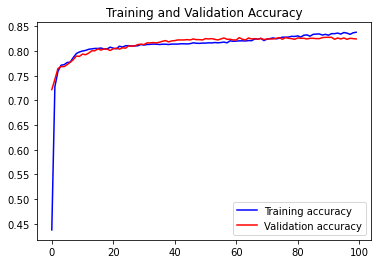

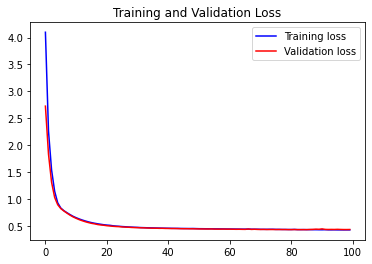

In [17]:
dataset = pd.read_csv('input/dataset_merged_2d.csv')[:5000]

del_feature = ['link','label']
use_features = [i for i in dataset.columns if i not in del_feature]
category = ["direction","pathclass","speedclass","LaneNum","level"]
print(datetime.datetime.now())

DNN = DNN_Model(dataset=dataset,label="label",
                use_features=use_features,
                categorical_feats=None, n_class=3)

loss = DNN[0]
acc = DNN[1]
history = DNN[2]

print("Loss on test set = ", loss)
print("Accuracy on test set = ", acc)

print(datetime.datetime.now())

plot_learning_curves(history)

In [18]:
# DNN model

def DNN_Model(dataset=None,label=None,use_features=None,categorical_feats=None, n_class=3):
    input_length = dataset[use_features].shape[0]
    input_dim = dataset[use_features].shape[1]
    
    Y = np_utils.to_categorical(dataset[label],num_classes=3)
    x_train, x_test, y_train, y_test = train_test_split(dataset[use_features], Y,
                                                        train_size=0.7, test_size=0.3, random_state=0)
    
    # define the model 
    init = K.initializers.glorot_uniform(seed=1)
    simple_adam = K.optimizers.Adam(lr=0.001)
    model = K.models.Sequential()
    model.add(K.layers.Dense(units=5, input_shape=(input_dim,), kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=6, kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=n_class, kernel_initializer=init, activation='softmax'))
    model.compile(loss="categorical_crossentropy",
                  optimizer=simple_adam,
                  #optimizer="rmsprop",
                  metrics=["accuracy"])

    # train the model
    b_size = 1000
    max_epochs = 100
    print ("Start training \n")
    
    history = model.fit(x_train, y_train, 
                        batch_size=b_size,
                        epochs=max_epochs,
                        shuffle=True,
                        validation_data=(x_test, y_test),
                        verbose=1)
    print ("Training completed \n")
    
    # evaluate the model performance
    # scores: includes val_loss and val_acc
    scores = model.evaluate(x_test, y_test, batch_size=b_size,verbose=0)
    print(scores)
    loss = scores[0]
    acc = scores[1]
    
    return loss,acc,history

2020-12-14 17:47:11.670707
Start training 

Train on 2866012 samples, validate on 1228292 samples
Epoch 1/100
2866012/2866012 [==============================] - 28s 10us/step - loss: 0.4991 - accuracy: 0.8242 - val_loss: 0.4146 - val_accuracy: 0.8427
Epoch 2/100
2866012/2866012 [==============================] - 23s 8us/step - loss: 0.4075 - accuracy: 0.8464 - val_loss: 0.4080 - val_accuracy: 0.8456
Epoch 3/100
2866012/2866012 [==============================] - 22s 8us/step - loss: 0.4031 - accuracy: 0.8479 - val_loss: 0.4011 - val_accuracy: 0.8476
Epoch 4/100
2866012/2866012 [==============================] - 26s 9us/step - loss: 0.4018 - accuracy: 0.8484 - val_loss: 0.4028 - val_accuracy: 0.8481
Epoch 5/100
2866012/2866012 [==============================] - 25s 9us/step - loss: 0.4012 - accuracy: 0.8487 - val_loss: 0.4008 - val_accuracy: 0.8480
Epoch 6/100
2866012/2866012 [==============================] - 24s 8us/step - loss: 0.4011 - accuracy: 0.8488 - val_loss: 0.3997 - val_accura

Epoch 54/100
2866012/2866012 [==============================] - 14s 5us/step - loss: 0.3836 - accuracy: 0.8518 - val_loss: 0.3897 - val_accuracy: 0.8497
Epoch 55/100
2866012/2866012 [==============================] - 15s 5us/step - loss: 0.3835 - accuracy: 0.8517 - val_loss: 0.3968 - val_accuracy: 0.8472
Epoch 56/100
2866012/2866012 [==============================] - 14s 5us/step - loss: 0.3835 - accuracy: 0.8517 - val_loss: 0.3820 - val_accuracy: 0.8521
Epoch 57/100
2866012/2866012 [==============================] - 13s 5us/step - loss: 0.3833 - accuracy: 0.8519 - val_loss: 0.3836 - val_accuracy: 0.8517
Epoch 58/100
2866012/2866012 [==============================] - 14s 5us/step - loss: 0.3833 - accuracy: 0.8518 - val_loss: 0.3834 - val_accuracy: 0.8514
Epoch 59/100
2866012/2866012 [==============================] - 14s 5us/step - loss: 0.3831 - accuracy: 0.8519 - val_loss: 0.3840 - val_accuracy: 0.8508
Epoch 60/100
2866012/2866012 [==============================] - 14s 5us/step - los

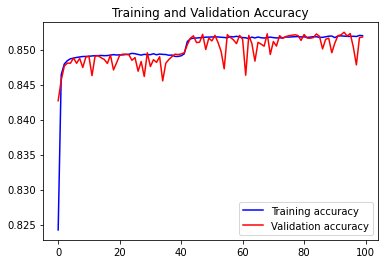

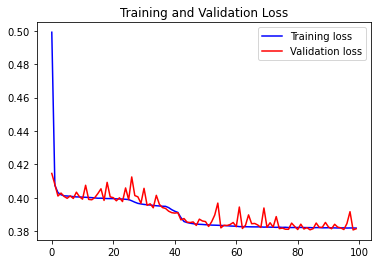

In [19]:
dataset = pd.read_csv('input/dataset_merged_2d.csv')

del_feature = ['link','label']
use_features = [i for i in dataset.columns if i not in del_feature]
category = ["direction","pathclass","speedclass","LaneNum","level"]
print(datetime.datetime.now())

DNN = DNN_Model(dataset=dataset,label="label",
                use_features=use_features,
                categorical_feats=None, n_class=3)

loss = DNN[0]
acc = DNN[1]
history = DNN[2]

print("Loss on test set = ", loss)
print("Accuracy on test set = ", acc)

print(datetime.datetime.now())

plot_learning_curves(history)

In [20]:
# DNN model

def DNN_Model(dataset=None,label=None,use_features=None,categorical_feats=None, n_class=3):
    input_length = dataset[use_features].shape[0]
    input_dim = dataset[use_features].shape[1]
    
    Y = np_utils.to_categorical(dataset[label],num_classes=3)
    x_train, x_test, y_train, y_test = train_test_split(dataset[use_features], Y,
                                                        train_size=0.7, test_size=0.3, random_state=0)
    
    # define the model 
    init = K.initializers.glorot_uniform(seed=1)
    simple_adam = K.optimizers.Adam(lr=0.001)
    model = K.models.Sequential()
    model.add(K.layers.Dense(units=5, input_shape=(input_dim,), kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=6, kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=n_class, kernel_initializer=init, activation='softmax'))
    model.compile(loss="categorical_crossentropy",
                  optimizer=simple_adam,
                  #optimizer="rmsprop",
                  metrics=["accuracy"])

    # train the model
    b_size = 200
    max_epochs = 50
    print ("Start training \n")
    
    history = model.fit(x_train, y_train, 
                        batch_size=b_size,
                        epochs=max_epochs,
                        shuffle=True,
                        validation_data=(x_test, y_test),
                        verbose=1)
    print ("Training completed \n")
    
    # evaluate the model performance
    # scores: includes val_loss and val_acc
    scores = model.evaluate(x_test, y_test, batch_size=b_size,verbose=0)
    print(scores)
    loss = scores[0]
    acc = scores[1]
    
    return loss,acc,history

2020-12-14 18:53:53.375724
Start training 

Train on 2866012 samples, validate on 1228292 samples
Epoch 1/50
2866012/2866012 [==============================] - 67s 24us/step - loss: 0.4257 - accuracy: 0.8418 - val_loss: 0.4026 - val_accuracy: 0.8480
Epoch 2/50
2866012/2866012 [==============================] - 54s 19us/step - loss: 0.4018 - accuracy: 0.8479 - val_loss: 0.3961 - val_accuracy: 0.8486
Epoch 3/50
2866012/2866012 [==============================] - 50s 17us/step - loss: 0.3977 - accuracy: 0.8487 - val_loss: 0.3953 - val_accuracy: 0.8489
Epoch 4/50
2866012/2866012 [==============================] - 48s 17us/step - loss: 0.3966 - accuracy: 0.8491 - val_loss: 0.3992 - val_accuracy: 0.8479
Epoch 5/50
2866012/2866012 [==============================] - 52s 18us/step - loss: 0.3957 - accuracy: 0.8492 - val_loss: 0.3931 - val_accuracy: 0.8495
Epoch 6/50
2866012/2866012 [==============================] - 50s 17us/step - loss: 0.3945 - accuracy: 0.8491 - val_loss: 0.3922 - val_accurac

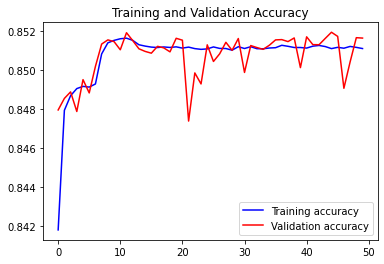

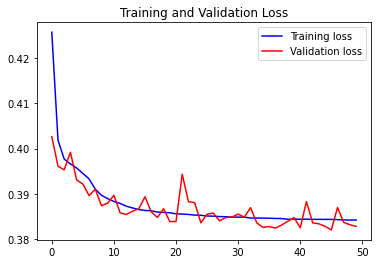

In [21]:
dataset = pd.read_csv('input/dataset_merged_2d.csv')

del_feature = ['link','label']
use_features = [i for i in dataset.columns if i not in del_feature]
category = ["direction","pathclass","speedclass","LaneNum","level"]
print(datetime.datetime.now())

DNN = DNN_Model(dataset=dataset,label="label",
                use_features=use_features,
                categorical_feats=None, n_class=3)

loss = DNN[0]
acc = DNN[1]
history = DNN[2]

print("Loss on test set = ", loss)
print("Accuracy on test set = ", acc)

print(datetime.datetime.now())

plot_learning_curves(history)